In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = {
    'offline_instr': '/u/cmolder/GitHub/Pythia/out/astar_313B-perceptron-no-no-from_file-ship-1core-2048llc_sets.txt',
    #'offline_call': '/u/cmolder/GitHub/Pythia/out/astar_313B-perceptron-no-no-from_file-ship-1core-2048llc_sets_call.txt',
    'online': '/u/cmolder/GitHub/Pythia/out/astar_313B-perceptron-no-no-sisb_na-ship-1core-2048llc_sets.txt',
    'nopref': '/u/cmolder/GitHub/Pythia/out/astar_313B-perceptron-no-no-no-ship-1core-2048llc_sets.txt',
}

In [3]:
def get_ipcs(path):
    heartbeats = []
    cumulative = []
    warmed_up = False
    
    with open(path, 'r') as f:
        for line in f:
            if 'Warmup' in line:
                warmed_up = True
            
            if 'Heartbeat CPU' in line and warmed_up: 
                tokens = line.split()
                heartbeats.append(float(tokens[9]))
                cumulative.append(float(tokens[12]))
                
    return heartbeats, cumulative

In [4]:
heartbeats = {}
cumulative = {}

for pref, path in files.items():
    heartbeats[pref], cumulative[pref] = get_ipcs(path)

In [5]:
def plot(ipc_dict, title=None, dpi=None):
    
    fig, ax = plt.subplots(dpi=dpi)
    
    for pref, ipcs in ipc_dict.items():
        ax.plot(np.arange(len(ipcs)), ipcs, label=pref)
      
    fig.suptitle(title)
    fig.legend()
    ax.set_xlabel('Heartbeat (M instructions after warmup)')
    
    plt.show()

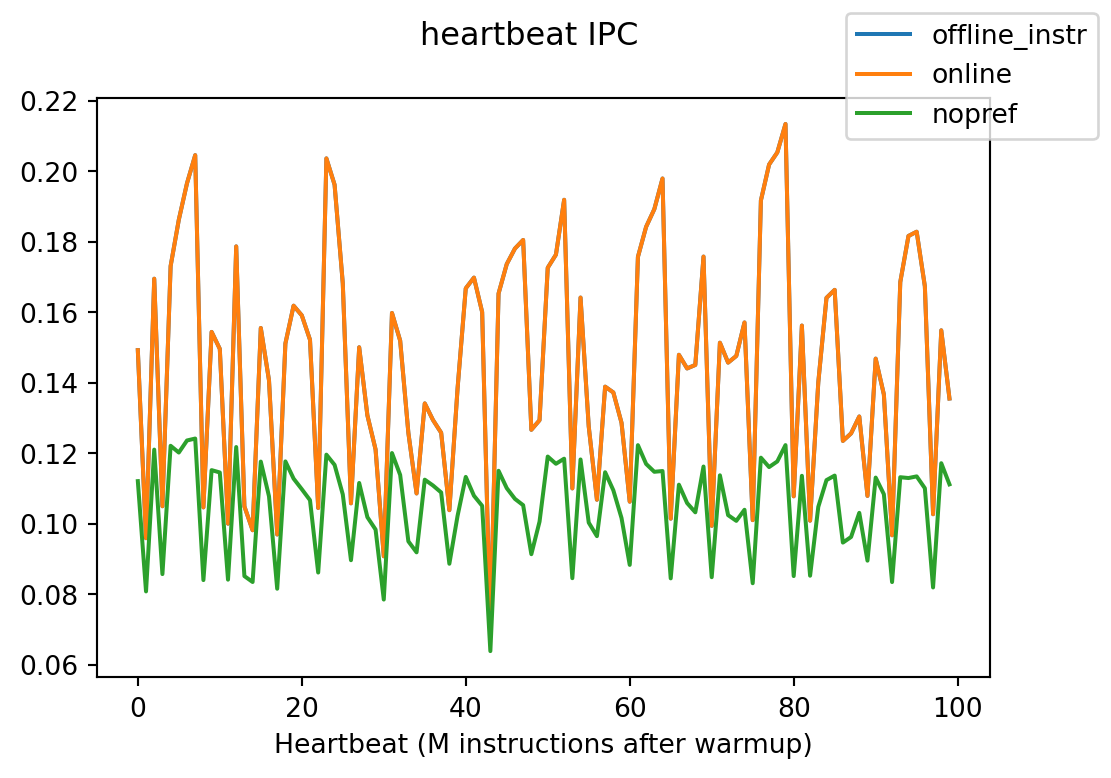

In [6]:
dpi = 192
plot(heartbeats, dpi=dpi, title='heartbeat IPC')

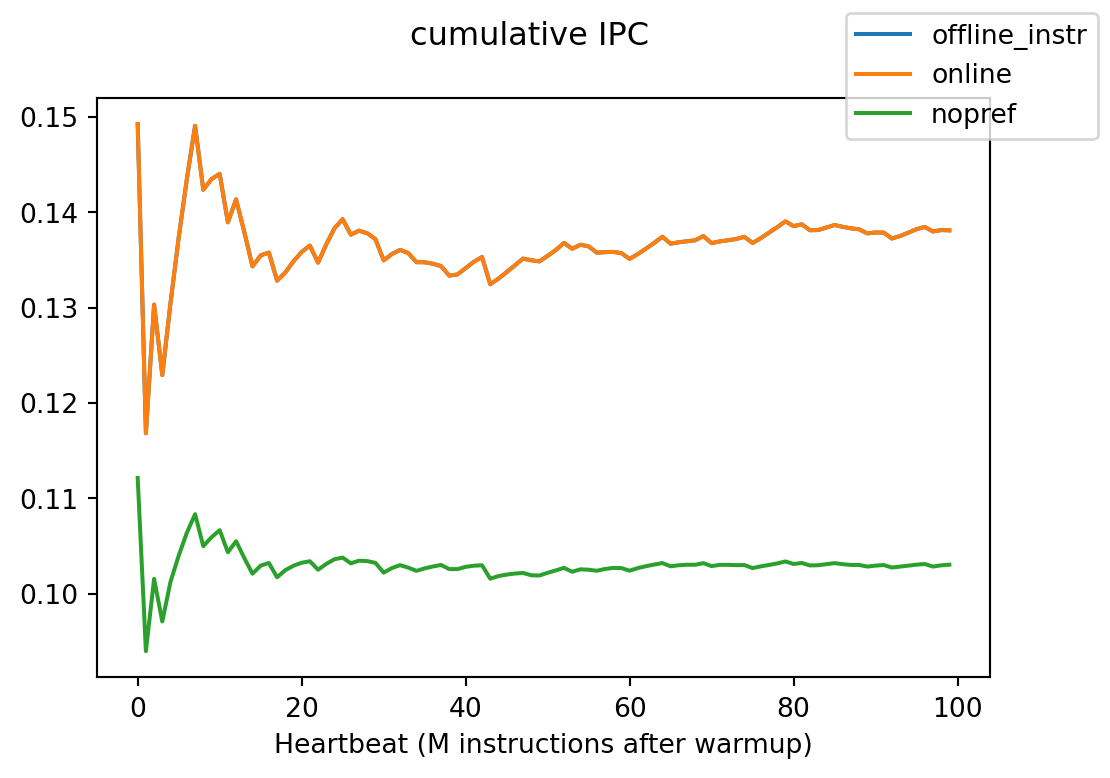

In [7]:
dpi = 192
plot(cumulative, dpi=dpi, title='cumulative IPC')